# Tools for Modern Macroeconometrics: Homework 5

# Jan Suchánek

In [81]:
library(dplyr)
library(mFilter)
library(pdfetch)

install.packages("midasr")
library(midasr)

package 'midasr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jsuch\AppData\Local\Temp\RtmpQRgZPb\downloaded_packages


Warning message:
"package 'midasr' was built under R version 3.6.3"Loading required package: quantreg
Warning message:
"package 'quantreg' was built under R version 3.6.3"Error: package or namespace load failed for 'quantreg' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'conquer'


ERROR: Error: package 'quantreg' could not be loaded


### 1. Get a time series of GDP (log, real terms, seasonally adjusted series) of your country of interest.

I choose (traditionally) Finland, quarterly, seasonally adjusted data.

,date,real_gdp
123,2020-07-01,50392.6
124,2020-10-01,50904.6
125,2021-01-01,50758.9
126,2021-04-01,51669.3
127,2021-07-01,52148.2
128,2021-10-01,52451.1


Observations: 128
Variables: 2
$ date     <fct> 1990-01-01, 1990-04-01, 1990-07-01, 1990-10-01, 1991-01-01...
$ real_gdp <dbl> 32133.4, 31691.2, 31012.2, 30834.4, 30233.1, 29871.2, 2925...


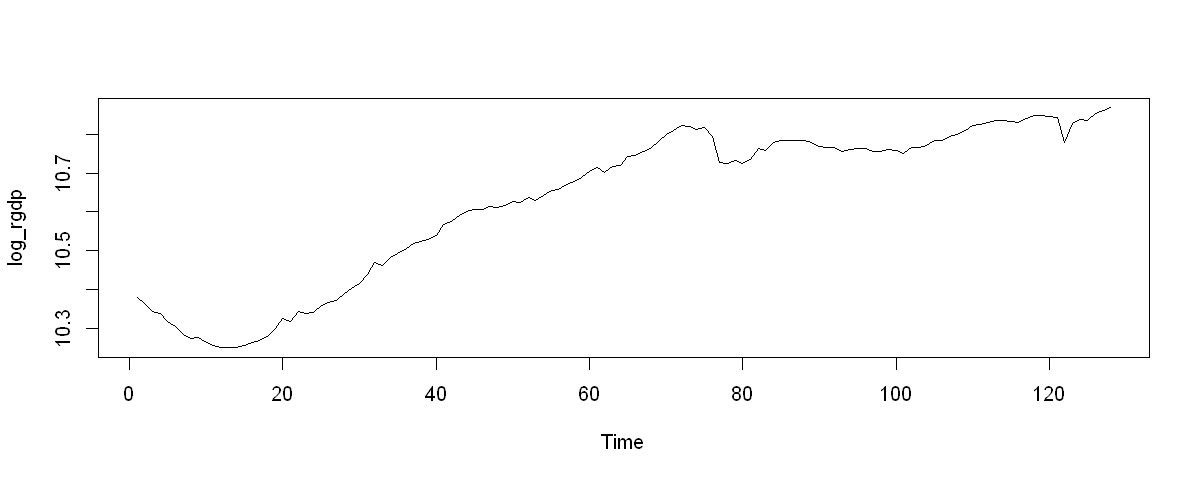

In [24]:
finland <- read.csv("CLVMNACSCAB1GQFI.csv")

colnames(finland) <- c("date", "real_gdp")
tail(finland)

finland %>% glimpse

log_rgdp <- log(finland$real_gdp)

options(repr.plot.width = 10, repr.plot.height = 4)

plot.ts(log_rgdp)

### 2. Find turning points of your time series. Use sequential application of logical rules mentioned on slide 10. What's the average duration and recession? Compare it with the Hodrick-Prescott filter.

Lets difference the time series  in order to get rid of trend.

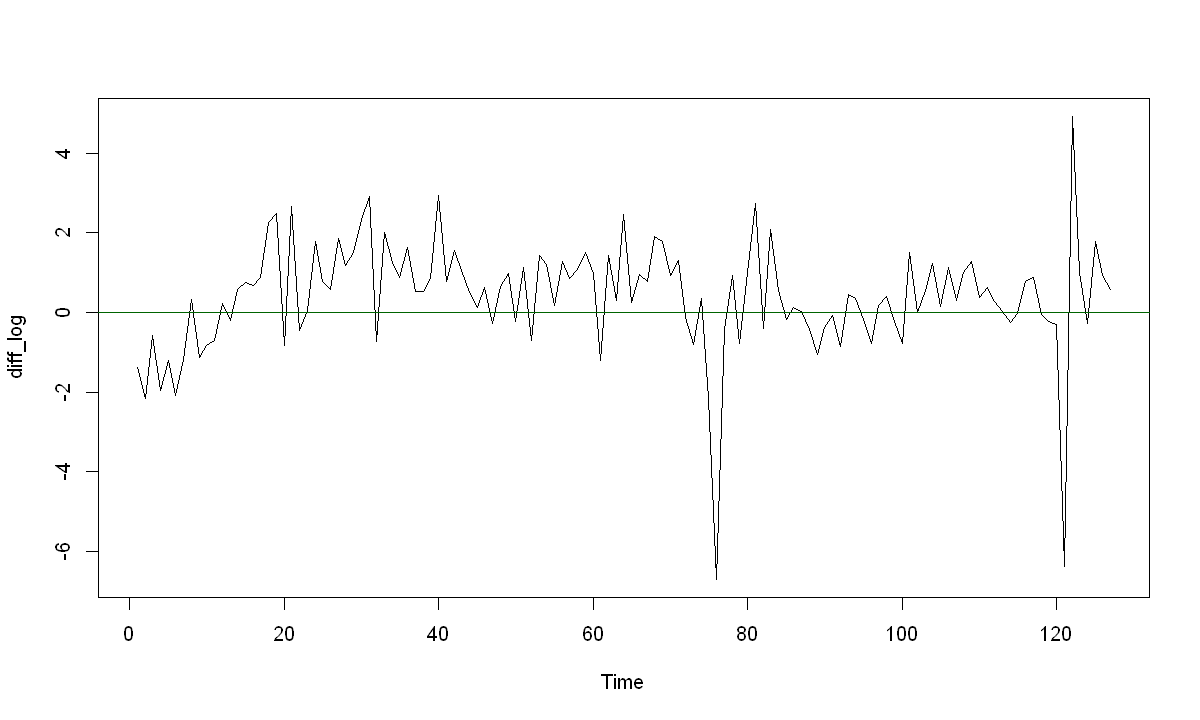

In [29]:
diff_log <- diff(log_rgdp) * 100

options(repr.plot.width = 10, repr.plot.height = 6)

plot.ts(diff_log , lwd = 0.1)
# lty = "dashed", lwd = 3,
abline(h = 0, col = "darkgreen")

I will start with A.Okun (1962) to identify 2 or more subsequent quarters of negative gdp growth.

In [21]:
tf <- diff_log < 0
suma 

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [13]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [49] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [73]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [85]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [97] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[121]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE

In [23]:
?pdfetch_EUROSTAT

Now I will apply Hodrick-Prescott Filter and compare the results:


Title:
 Hodrick-Prescott Filter 

Call:
 mFilter::hpfilter(x = log_rgdp, freq = 1600, type = "lambda")

Method:
 hpfilter

Filter Type:
 lambda

Series:
 log_rgdp

Descriptive Statistics:
 
    log_rgdp         Trend           Cycle          
 Min.   :10.25   Min.   :10.28   Min.   :-0.062136  
 1st Qu.:10.47   1st Qu.:10.45   1st Qu.:-0.012444  
 Median :10.72   Median :10.74   Median :-0.000794  
 Mean   :10.63   Mean   :10.63   Mean   : 0.000000  
 3rd Qu.:10.78   3rd Qu.:10.77   3rd Qu.: 0.013031  
 Max.   :10.87   Max.   :10.86   Max.   : 0.055865  

In-sample error measures:
        ME        MSE        MAE        MPE       MAPE 
 1.197e-18  4.266e-04  1.586e-02 -6.121e-06  1.494e-03 



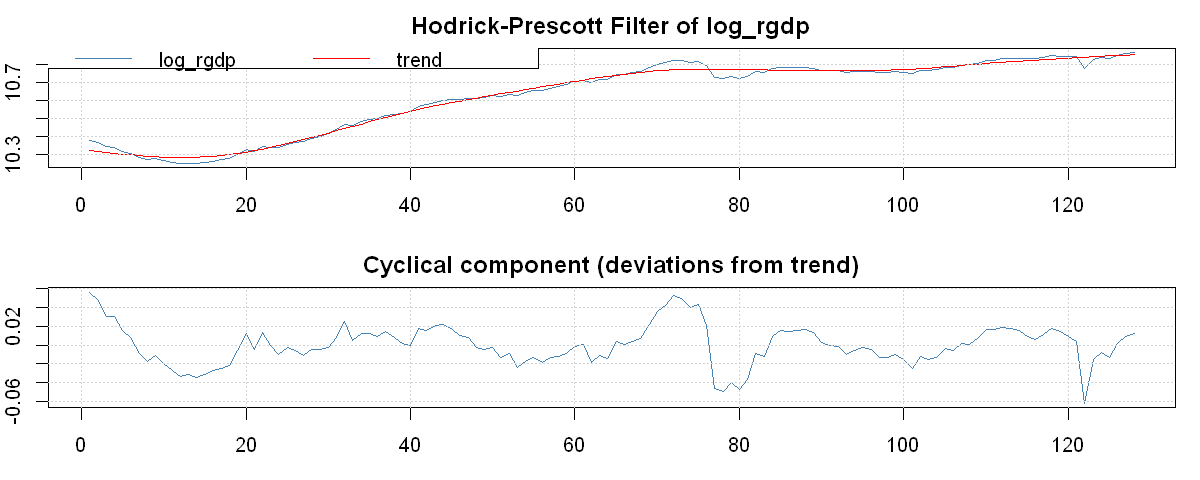

In [8]:
hpfinland <- mFilter::hpfilter(log_rgdp,freq=1600,type="lambda")

summary(hpfinland)
plot(hpfinland)

### 3. Get another time series with higher frequency, such as industrial production, unemployment. Estimate a model that will mix both frequencies. It's up to you whether to opt for the MIDAS model or the structural time series model. Grab fitted values for 2021Q4 and make a prediction for 2022Q1.

In [64]:
unemp <- read.csv("DP_LIVE_28032022211205262.csv")
unemp <- unemp[,c("TIME", "Value")] # subset only the important stuff

gdp <- read.csv("CLVMNACSCAB1GQFI.csv")
colnames(gdp) <- c("date", "real_gdp")

gdp <- ts(gdp$real_gdp, frequency = 4, start = c(1990, 1))
unemp <- ts(unemp$Value, frequency = 12, start = c(1990, 1))

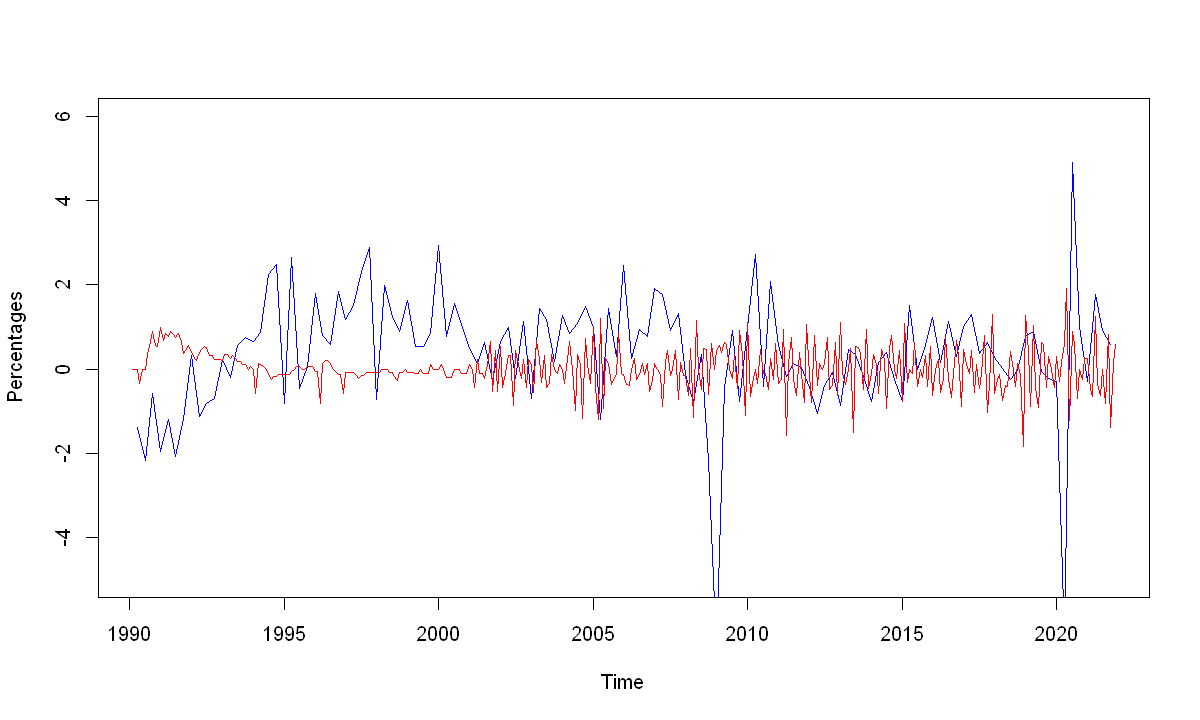

In [79]:
gdp_x <- window(gdp, end = c(2021, 4))
unemp_y <- window(unemp, end = c(2021, 12))

gdp_ld <- diff(log(gdp_x))*100
unemp_ld <- diff(log(unemp_y)) * 10

# Graph of the data
plot.ts(gdp_ld, xlab = "Time", ylab = "Percentages", col = "blue", ylim = c(-5, 6))
lines(unemp_ld, col = "red")

In [85]:
beta0 <- midasr::midas_r(gdp_ld ~ mls(gdp_ld, 1, 1) + mls(unemp_ld, 3:11, 3, nbeta), start = list(unemp_ld = c(1.7, 1, 5)))
coef(beta0) #prints the estimated coefficients

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): there is no package called 'conquer'


In [83]:
?midasr::midas_r

In [63]:
unemp

TIME,Value
1990-01,3.0
1990-02,3.0
1990-03,3.0
1990-04,3.0
1990-05,2.9
1990-06,2.9
1990-07,2.9
1990-08,3.0
1990-09,3.2
1990-10,3.5


In [40]:
?window